In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#import matplotlib.colors as colors
plt.style.use('ggplot')
from matplotlib import style
#import squarify

In [2]:
df =pd.read_csv(r'C:\Users\nilli\ulta2.csv')
df

,brand,category,price,product,review_avg_rating,review_count,url
0,Dermalogica,skincare,39.00,Special Cleansing Gel,4.6,2252,https://www.ulta.com/special-cleansing-gel?pro...
1,Sebastian,hair,40.00,Drench Conditioner,4.6,2144,https://www.ulta.com/drench-conditioner?produc...
2,Giorgio Armani,cologne,100.00,Acqua di Giò Absolu Eau de Parfum,4.8,1937,https://www.ulta.com/acqua-di-gio-absolu-eau-d...
3,Giorgio Armani,cologne,88.00,Acqua di Giò Pour Homme Eau de Toilette,4.8,1751,https://www.ulta.com/acqua-di-gio-pour-homme-e...
4,Giorgio Armani,cologne,79.00,Emporio Armani Stronger With You Eau de Toilette,4.7,1623,https://www.ulta.com/emporio-armani-stronger-w...
...,...,...,...,...,...,...,...
610,Triumph & Disaster,shaving,13.97,Old Fashioned Shave Cream Tube,0.0,0,https://www.ulta.com/old-fashioned-shave-cream...
611,Triumph & Disaster,skincare,28.97,Gameface Moisturiser Tube,0.0,0,https://www.ulta.com/gameface-moisturiser-tube...
612,Triumph & Disaster,skincare,14.97,Ritual Face Cleanser,0.0,0,https://www.ulta.com/ritual-face-cleanser?prod...
613,Volt,shaving,28.00,Instant Beard Color,0.0,0,https://www.ulta.com/instant-beard-color?produ...


In [3]:
df.columns.tolist()

['brand',
 'category',
 'price',
 'product',
 'review_avg_rating',
 'review_count',
 'url']

In [4]:
df.shape


(615, 7)

In [5]:
df.describe()

,price,review_avg_rating,review_count
count,615.000000,615.000000,615.000000
mean,34.329675,3.904325,83.191870
std,27.942195,1.618499,232.423002
min,0.750000,0.000000,0.000000
25%,16.000000,4.000000,2.000000
50%,22.990000,4.600000,10.000000
75%,41.595000,4.800000,61.500000
max,120.000000,5.000000,2252.000000


In [6]:
df.dtypes

brand                 object
category              object
price                float64
product               object
review_avg_rating    float64
review_count           int64
url                   object
dtype: object

In [7]:
df['brand'].nunique()

87

In [8]:
df['product'].nunique()

603

In [9]:
#df.nunique

In [10]:
# df2 = df.copy
# df2

In [11]:
df3 =df.groupby('brand').agg('mean')
df3

,price,review_avg_rating,review_count
brand,,,
18.21 Man Made,28.625000,3.062500,3.500000
Ahava,31.200000,4.780000,11.600000
American Crew,17.526571,3.985714,24.028571
Aquaphor,10.240000,4.350000,62.000000
Aramis,28.000000,4.000000,9.000000
...,...,...,...
Viviscal,44.990000,3.700000,3.000000
Volt,28.000000,0.000000,0.000000
Wahl,59.990000,3.000000,2.000000


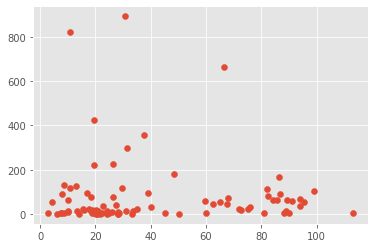

In [12]:
plt.scatter(df3['price'], df3['review_count'])

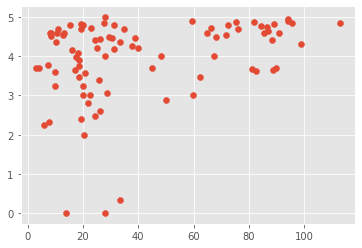

In [13]:
plt.scatter(df3['price'], df3['review_avg_rating'])

In [14]:
df.groupby('category')['review_count'].count().sort_values(ascending= False)#.plot(color ='#000080')



category
hair        170
cologne     132
shaving     127
skincare    109
body         77
Name: review_count, dtype: int64

Text(0, 0.5, 'Count of Reviews Counted')

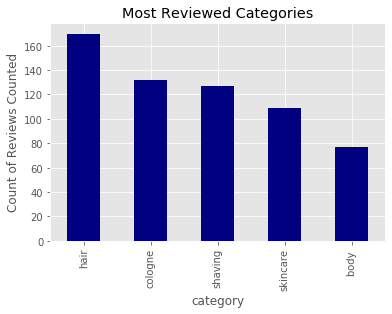

In [15]:
#plt.figure(figsize=(12,8))
df.groupby('category')['review_count'].count().sort_values(ascending= False).plot.bar(color ='#000080')
plt.title('Most Reviewed Categories')
plt.ylabel('Count of Reviews Counted')


In [16]:
#plt.savefig('a.pdf')

#plt.savefig()

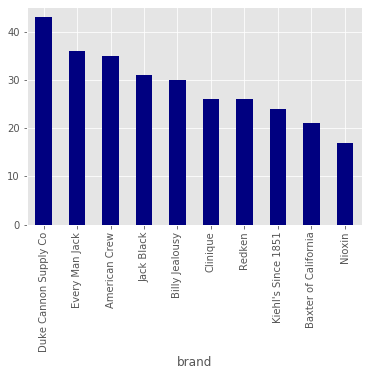

In [17]:
df.groupby('brand')['review_count'].count().sort_values(ascending= False).head(10).plot.bar(color ='#000080')

In [18]:
#df['review_count'].sort_values(ascending= False)#head(10).plot.bar(color ='#000080')
df[['category','brand','review_count']].sort_values(by=['review_count'],ascending= False).head(5)

,category,brand,review_count
0,skincare,Dermalogica,2252
1,hair,Sebastian,2144
2,cologne,Giorgio Armani,1937
3,cologne,Giorgio Armani,1751
4,cologne,Giorgio Armani,1623


In [19]:
df[['category','product','review_count']].sort_values(by=['category','review_count'],ascending= False).head(5)#.plot.bar(color ='#000080')

,category,product,review_count
0,skincare,Special Cleansing Gel,2252
8,skincare,Active Moist,970
13,skincare,Clarifying Cleanser,777
18,skincare,Intense Therapy Lip Balm SPF 25,711
21,skincare,Acne Solutions Cleansing Bar for Face & Body,535


In [20]:
dfbrc =df[['category','brand','product','review_count']].sort_values(by=['review_count','brand'],ascending= False).head(5)
dfbrc

,category,brand,product,review_count
0,skincare,Dermalogica,Special Cleansing Gel,2252
1,hair,Sebastian,Drench Conditioner,2144
2,cologne,Giorgio Armani,Acqua di Giò Absolu Eau de Parfum,1937
3,cologne,Giorgio Armani,Acqua di Giò Pour Homme Eau de Toilette,1751
4,cologne,Giorgio Armani,Emporio Armani Stronger With You Eau de Toilette,1623


<Figure size 1440x720 with 0 Axes>

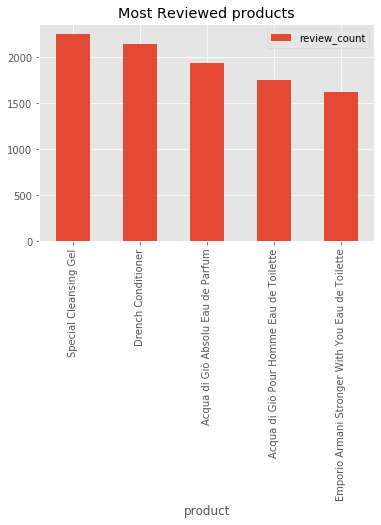

In [21]:
plt.figure(figsize=(20,10))
dfbrc.plot.bar(x='product', y ='review_count', title = 'Most Reviewed products')

[Text(0, 0, 'Special Cleansing Gel'),
 Text(0, 0, 'Drench Conditioner'),
 Text(0, 0, 'Acqua di Giò Absolu Eau de Parfum'),
 Text(0, 0, 'Acqua di Giò Pour Homme Eau de Toilette'),
 Text(0, 0, 'Emporio Armani Stronger With You Eau de Toilette')]

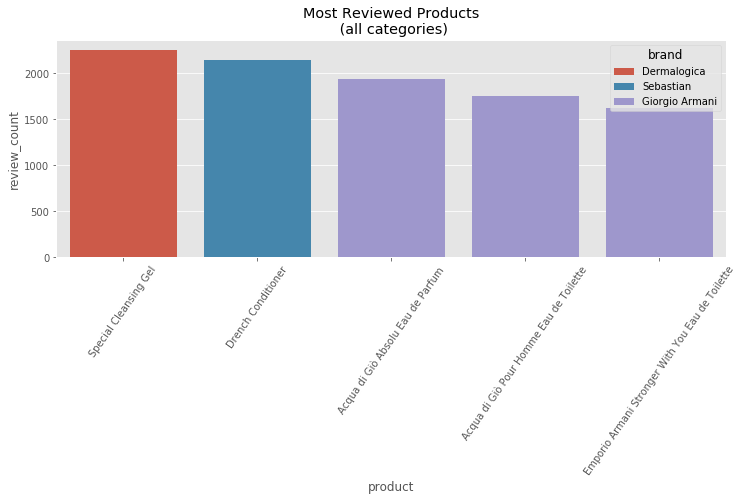

In [22]:
plt.figure(figsize=(12,4))
dfbrcchart= sns.barplot(x="product",
y="review_count",
            hue="brand",
data=dfbrc, dodge = False)
plt.title('Most Reviewed Products\n (all categories)')

dfbrcchart
dfbrcchart.set_xticklabels(dfbrcchart.get_xticklabels(), rotation=55)

[Text(0, 0, 'Dermalogica'),
 Text(0, 0, 'Sebastian'),
 Text(0, 0, 'Giorgio Armani')]

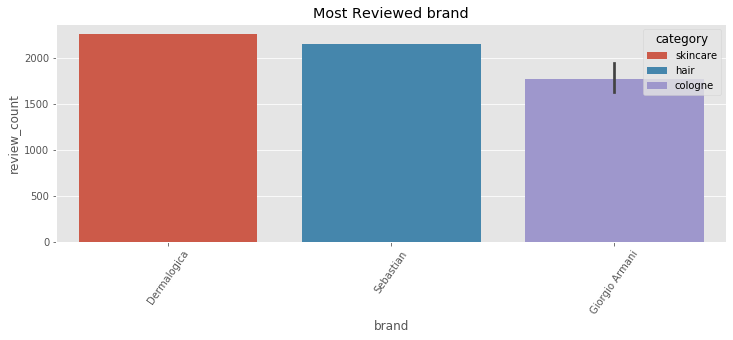

In [23]:
plt.figure(figsize=(12,4))
dfbrcchart= sns.barplot(x="brand",
y="review_count",
            hue="category",
data=dfbrc, dodge = False)
plt.title('Most Reviewed brand')

dfbrcchart
dfbrcchart.set_xticklabels(dfbrcchart.get_xticklabels(), rotation=55)

In [24]:
df1 =df[['category','product','review_count']].sort_values(by=['category','review_count'],ascending= False)
df1

,category,product,review_count
0,skincare,Special Cleansing Gel,2252
8,skincare,Active Moist,970
13,skincare,Clarifying Cleanser,777
18,skincare,Intense Therapy Lip Balm SPF 25,711
21,skincare,Acne Solutions Cleansing Bar for Face & Body,535
...,...,...,...
559,body,Skin Clearing Acne Defense Body Wash,0
560,body,Sandalwood Body Value Kit,0
561,body,Cedarwood Body Value Kit,0
566,body,Cedarwood Body Bar with Shea Butter,0


<Figure size 1152x576 with 0 Axes>

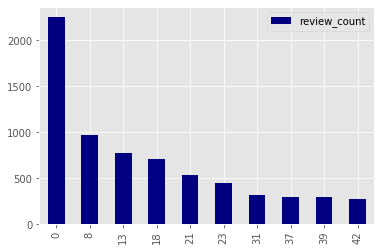

In [25]:
plt.figure(figsize=(16,8))
df1.head(10).plot.bar(color ='#000080')

#plt.title('top 10 skincare product by reviews count')
#plt


<Figure size 1152x576 with 0 Axes>

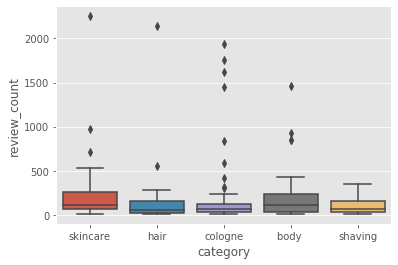

<Figure size 1152x576 with 0 Axes>

In [34]:
df[['category','product','price','review_count']].sort_values(by=['review_count'],ascending= False).head(10)

,category,product,price,review_count
0,skincare,Special Cleansing Gel,39.00,2252
1,hair,Drench Conditioner,40.00,2144
2,cologne,Acqua di Giò Absolu Eau de Parfum,100.00,1937
3,cologne,Acqua di Giò Pour Homme Eau de Toilette,88.00,1751
4,cologne,Emporio Armani Stronger With You Eau de Toilette,79.00,1623
5,body,Daily Moisturizing Lotion,7.49,1456
6,cologne,Armani Code Colonia Eau de Toilette,98.00,1444
7,hair,Scalp & Hair Leave-In Treatement System 4 (Col...,19.50,1102
8,skincare,Active Moist,42.00,970
9,body,Eczema Therapy Moisturizing Cream,13.49,925


<Figure size 1440x576 with 0 Axes>

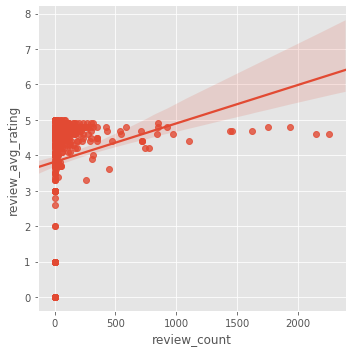

<Figure size 1440x576 with 0 Axes>

In [35]:
sns.lmplot("review_count", "review_avg_rating", df)
# critic_df.plot( kind ='scatter',x='num_critic_for_reviews', y='imdb_score')
# plt.xlabel('Number of Critic for Reviews')
# plt.ylabel('Imdb Scores')
# plt.title('Number of Critics for Reviews vs Imdb Scores')
#sns.lmplot("review_count", "price", df)
#sns.lmplot("price", "review_avg_rating", df)
plt.figure(figsize=(20,8))


In [ ]:
sns.violinplot(x="review_count", y="category", hue="category",data=df1,figsize=(16,6))

In [ ]:
plt.figure(figsize=(16,6))
df.groupby('brand')['review_count'].count().sort_values(ascending= False).head(10).plot.bar(color ='#000080')

In [27]:
df4 =df[['category','brand','product','price','review_count', 'review_avg_rating']]
#.groupby([df2.index.hour,'sleep_summary_id')

Filter out observations with less than the median review count and review average rating

In [28]:
df4['review_avg_rating'].median()

4.6

In [29]:
df4['review_count'].median()

10.0

In [30]:
df5 =df4[df4['review_avg_rating']>=4.6 ]
df5

,category,brand,product,price,review_count,review_avg_rating
0,skincare,Dermalogica,Special Cleansing Gel,39.00,2252,4.6
1,hair,Sebastian,Drench Conditioner,40.00,2144,4.6
2,cologne,Giorgio Armani,Acqua di Giò Absolu Eau de Parfum,100.00,1937,4.8
3,cologne,Giorgio Armani,Acqua di Giò Pour Homme Eau de Toilette,88.00,1751,4.8
4,cologne,Giorgio Armani,Emporio Armani Stronger With You Eau de Toilette,79.00,1623,4.7
...,...,...,...,...,...,...
513,hair,Thick Head,Clear Head Anti-Thinning 2-IN-1 Shampoo & Cond...,10.00,1,5.0
514,shaving,Tigi,Bed Head For Men Fuel Around Beard Oil,16.95,1,5.0
515,shaving,Triumph & Disaster,Old Fashioned Shave Cream Jar,14.97,1,5.0
516,skincare,Triumph & Disaster,Gameface Moisturiser Jar,29.97,1,5.0


In [36]:
df6= df5[df5['review_count']>=10]
df6

,category,brand,product,price,review_count,review_avg_rating
0,skincare,Dermalogica,Special Cleansing Gel,39.00,2252,4.6
1,hair,Sebastian,Drench Conditioner,40.00,2144,4.6
2,cologne,Giorgio Armani,Acqua di Giò Absolu Eau de Parfum,100.00,1937,4.8
3,cologne,Giorgio Armani,Acqua di Giò Pour Homme Eau de Toilette,88.00,1751,4.8
4,cologne,Giorgio Armani,Emporio Armani Stronger With You Eau de Toilette,79.00,1623,4.7
...,...,...,...,...,...,...
299,shaving,SheaMoisture,Maracuja Oil & Shea Butter Beard Balm,9.99,11,4.7
302,cologne,Coach,For Men Eau de Toilette Travel Spray,32.00,10,5.0
303,body,Baxter of California,Vitamin Cleansing Bar,18.00,10,4.8
304,cologne,Bvlgari,Man In Black Eau de Parfum,113.00,10,4.7


In [40]:
# df7 =df6.sort_values(['review_avg_rating'], ascending= False).head(10)
# df7
#df6[df6['category'=='body']].sort_values('review_avg_rating',ascending =False).head(5)
df7 = df6[df6['category']=='body '].sort_values('review_count',ascending =False).head(5)
#df6[df6['category']].sort_values('review_avg_rating',ascending =False).head(10)
df7

,category,brand,product,price,review_count,review_avg_rating
5,body,Aveeno,Daily Moisturizing Lotion,7.49,1456,4.7
9,body,Aveeno,Eczema Therapy Moisturizing Cream,13.49,925,4.8
10,body,Hempz,Original Herbal Body Moisturizer,23.00,852,4.8
11,body,Duke Cannon Supply Co,Big American Bourbon Soap,7.99,846,4.9
24,body,CeraVe,Moisturizing Cream For Normal To Dry Skin,18.99,433,4.7


In [42]:
df10 = df6[df6['category']=='shaving'].sort_values('review_count',ascending =False).head(5)
#df6[df6['category']].sort_values('review_avg_rating',ascending =False).head(10)
df10

,category,brand,product,price,review_count,review_avg_rating
30,shaving,Jack Black,Beard Oil,26.00,345,4.8
36,shaving,Jack Black,Beard Lube Conditioning Shave,35.00,297,4.9
46,shaving,Jack Black,Beard Wash,18.00,245,4.8
59,shaving,Tree Hut,Bare Moisturizing Shave Oil,11.99,191,4.8
60,shaving,Jack Black,Beard Grooming Kit,35.00,186,4.8


In [43]:
df11 = df6[df6['category']=='skincare'].sort_values('review_count',ascending =False).head(5)
#df6[df6['category']].sort_values('review_avg_rating',ascending =False).head(10)
df11

,category,brand,product,price,review_count,review_avg_rating
0,skincare,Dermalogica,Special Cleansing Gel,39.0,2252,4.6
8,skincare,Dermalogica,Active Moist,42.0,970,4.6
18,skincare,Jack Black,Intense Therapy Lip Balm SPF 25,8.0,711,4.7
21,skincare,Clinique,Acne Solutions Cleansing Bar for Face & Body,16.5,535,4.7
31,skincare,Jack Black,Turbo Wash Energizing Cleanser,23.0,319,4.9


In [44]:
df12 = df6[df6['category']=='cologne'].sort_values('review_count',ascending =False).head(5)
#df6[df6['category']].sort_values('review_avg_rating',ascending =False).head(10)
df12

,category,brand,product,price,review_count,review_avg_rating
2,cologne,Giorgio Armani,Acqua di Giò Absolu Eau de Parfum,100.0,1937,4.8
3,cologne,Giorgio Armani,Acqua di Giò Pour Homme Eau de Toilette,88.0,1751,4.8
4,cologne,Giorgio Armani,Emporio Armani Stronger With You Eau de Toilette,79.0,1623,4.7
6,cologne,Giorgio Armani,Armani Code Colonia Eau de Toilette,98.0,1444,4.7
12,cologne,Ralph Lauren,Polo Red Rush Eau de Toilette,90.0,840,4.6


In [45]:
df13 = df6[df6['category']=='hair'].sort_values('review_count',ascending =False).head(5)
#df6[df6['category']].sort_values('review_avg_rating',ascending =False).head(10)
df13

,category,brand,product,price,review_count,review_avg_rating
1,hair,Sebastian,Drench Conditioner,40.0,2144,4.6
20,hair,Tigi,Bed Head for Men Matte Separation Workable Wax,19.5,548,4.6
40,hair,Sebastian,Drench Shampoo,38.0,278,4.6
41,hair,Jack Black,All-Over Wash,50.0,274,4.8
63,hair,Sebastian,"SEB MAN The Multitasker Hair, Beard & Body Wash",14.5,178,4.9


In [ ]:
#df6[df6['category']=='body ']

[Text(0, 0, 'Daily Moisturizing Lotion'),
 Text(0, 0, 'Eczema Therapy Moisturizing Cream'),
 Text(0, 0, 'Original Herbal Body Moisturizer'),
 Text(0, 0, 'Big American Bourbon Soap'),
 Text(0, 0, 'Moisturizing Cream For Normal To Dry Skin')]

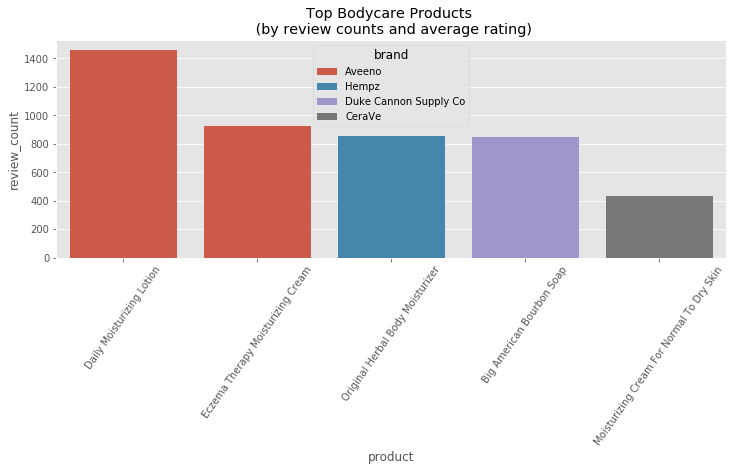

In [41]:
plt.figure(figsize=(12,4))
m  =sns.barplot(x="product",
y="review_count",
            hue="brand",
data=df7, dodge = False)
plt.title('Top Bodycare Products \n (by review counts and average rating)')

m
m.set_xticklabels(m.get_xticklabels(), rotation=55)

[Text(0, 0, 'Beard Oil'),
 Text(0, 0, 'Beard Lube Conditioning Shave'),
 Text(0, 0, 'Beard Wash'),
 Text(0, 0, 'Bare Moisturizing Shave Oil'),
 Text(0, 0, 'Beard Grooming Kit')]

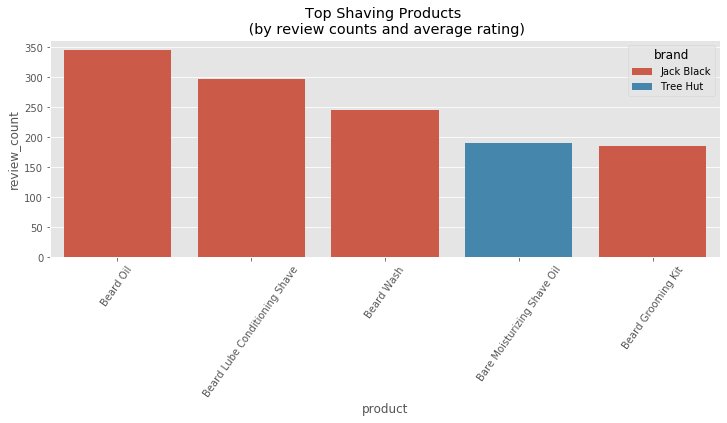

In [46]:
plt.figure(figsize=(12,4))
m  =sns.barplot(x="product",
y="review_count",
            hue="brand",
data=df10, dodge = False)
plt.title('Top Shaving Products \n (by review counts and average rating)')

m
m.set_xticklabels(m.get_xticklabels(), rotation=55)

[Text(0, 0, 'Special Cleansing Gel'),
 Text(0, 0, 'Active Moist'),
 Text(0, 0, 'Intense Therapy Lip Balm SPF 25'),
 Text(0, 0, 'Acne Solutions Cleansing Bar for Face & Body'),
 Text(0, 0, 'Turbo Wash Energizing Cleanser')]

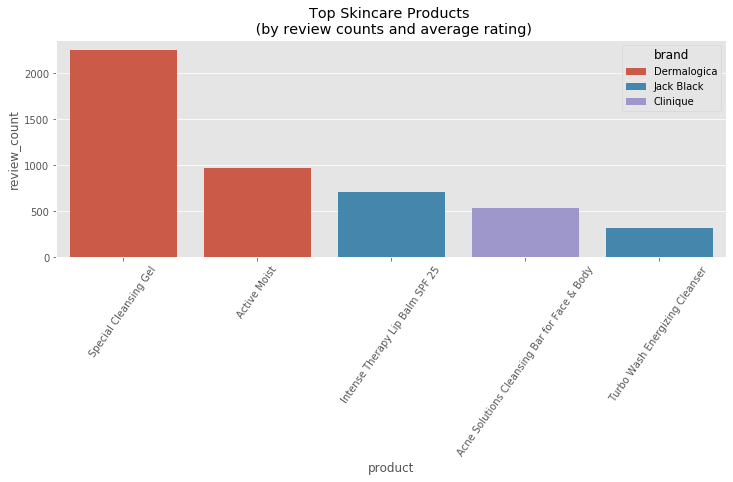

In [47]:
plt.figure(figsize=(12,4))
m  =sns.barplot(x="product",
y="review_count",
            hue="brand",
data=df11, dodge = False)
plt.title('Top Skincare Products \n (by review counts and average rating)')

m
m.set_xticklabels(m.get_xticklabels(), rotation=55)

[Text(0, 0, 'Acqua di Giò Absolu Eau de Parfum'),
 Text(0, 0, 'Acqua di Giò Pour Homme Eau de Toilette'),
 Text(0, 0, 'Emporio Armani Stronger With You Eau de Toilette'),
 Text(0, 0, 'Armani Code Colonia Eau de Toilette'),
 Text(0, 0, 'Polo Red Rush Eau de Toilette')]

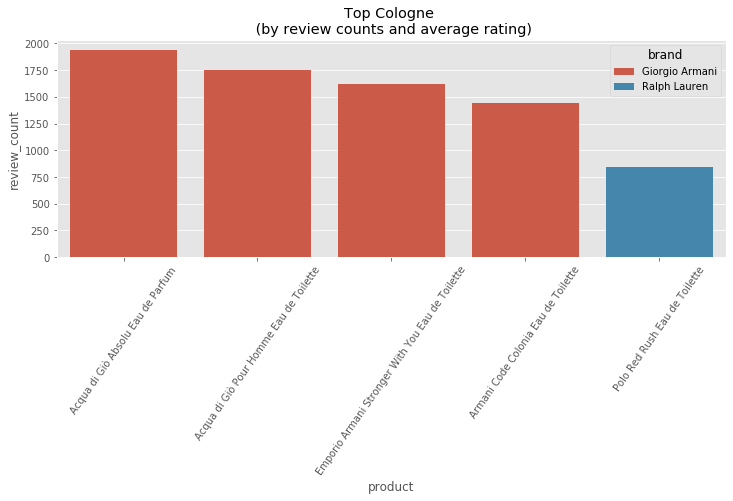

In [48]:
plt.figure(figsize=(12,4))
m  =sns.barplot(x="product",
y="review_count",
            hue="brand",
data=df12, dodge = False)
plt.title('Top Cologne \n (by review counts and average rating)')

m
m.set_xticklabels(m.get_xticklabels(), rotation=55)

[Text(0, 0, 'Drench Conditioner'),
 Text(0, 0, 'Bed Head for Men Matte Separation Workable Wax'),
 Text(0, 0, 'Drench Shampoo'),
 Text(0, 0, 'All-Over Wash'),
 Text(0, 0, 'SEB MAN The Multitasker Hair, Beard & Body Wash')]

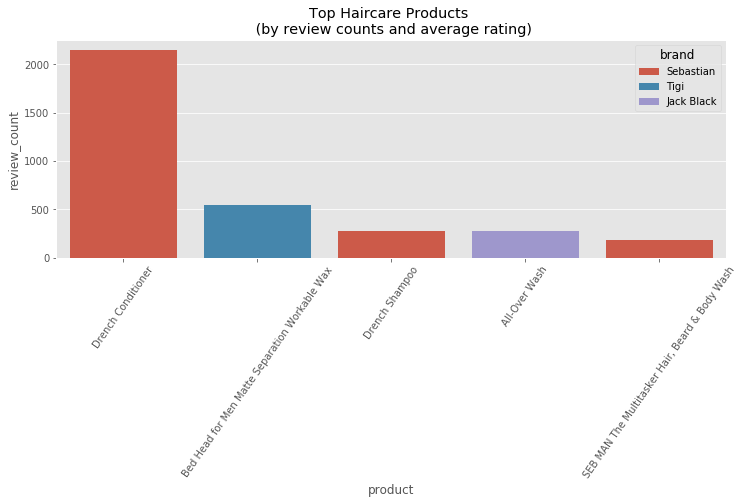

In [49]:
plt.figure(figsize=(12,4))
m  =sns.barplot(x="product",
y="review_count",
            hue="brand",
data=df13, dodge = False)
plt.title('Top Haircare Products \n (by review counts and average rating)')

m
m.set_xticklabels(m.get_xticklabels(), rotation=55)

In [ ]:

# #Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
# norm = matplotlib.colors.Normalize(vmin=min(df7['review_avg_rating']), vmax=max(df7['review_avg_rating']))
# colors = [matplotlib.cm.Blues(norm(value)) for value in df7['review_avg_rating']]

# #Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
# squarify.plot(label=df7['brand'],sizes=df7['review_avg_rating'], color = colors, alpha=.8)
# plt.title("Best Skincare Products",fontsize=23,fontweight="bold")
# plt.figure(figsize=(16,9))

# #Remove our axes and display the plot

# # Invert Y-Axis
# #plt.gca().invert_yaxis()
# plt.show()

In [ ]:
# df8 = df6[df6['category']=='body'].sort_values('review_count',ascending =False).head(5)
# df8

<Figure size 1152x576 with 0 Axes>

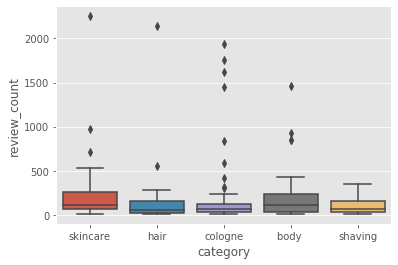

<Figure size 1152x576 with 0 Axes>

In [51]:
sns.boxplot(x='category', y='review_count', data=df6)
plt.figure(figsize=(16,8))

In [ ]:
df9 = df6[df6['category']=='shaving'].sort_values('review_avg_rating',ascending =False).head(5)
df9

In [ ]:
plt.figure(figsize=(10,4))
df.groupby('category')['price'].median().sort_values(ascending= True).head(5).plot.barh(color ='#000080' )
plt.title('Median Price by Category')
plt.xlabel('Median Price')